In [683]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import country_converter as coco

In [684]:
cases = pd.read_csv('coronavirus.csv')
vaccine = pd.read_csv('covid19_vaccine.csv')
economy = pd.read_csv('economy.csv')
# geography = pd.read_csv('geography.csv')
health = pd.read_csv('health.csv')
display(cases.head())

C:\Users\admin\AppData\Local\Temp\ipykernel_11716\3145425181.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  cases = pd.read_csv('coronavirus.csv')


,date,province,country,lat,long,type,cases,uid,iso2,iso3,code3,combined_key,population,continent_name,continent_code
0,2020-01-22,Alberta,Canada,53.9333,-116.5765,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN
1,2020-01-23,Alberta,Canada,53.9333,-116.5765,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN
2,2020-01-24,Alberta,Canada,53.9333,-116.5765,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN
3,2020-01-25,Alberta,Canada,53.9333,-116.5765,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN
4,2020-01-26,Alberta,Canada,53.9333,-116.5765,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN


In [685]:
cases.drop(['uid','code3','combined_key'],axis='columns', inplace=True)
display(cases.head())


,date,province,country,lat,long,type,cases,iso2,iso3,population,continent_name,continent_code
0,2020-01-22,Alberta,Canada,53.9333,-116.5765,confirmed,0,CA,CAN,4413146.0,North America,NaN
1,2020-01-23,Alberta,Canada,53.9333,-116.5765,confirmed,0,CA,CAN,4413146.0,North America,NaN
2,2020-01-24,Alberta,Canada,53.9333,-116.5765,confirmed,0,CA,CAN,4413146.0,North America,NaN
3,2020-01-25,Alberta,Canada,53.9333,-116.5765,confirmed,0,CA,CAN,4413146.0,North America,NaN
4,2020-01-26,Alberta,Canada,53.9333,-116.5765,confirmed,0,CA,CAN,4413146.0,North America,NaN


In [686]:
display(cases[cases['cases'].isnull()])
#all cases values are non-null
#value can be < 0 -> indicates that case was a false positive

wrong_iso2_rows = cases.loc[cases['iso2'].str.len() != 2]
# display(wrong_iso2_rows)
display(wrong_iso2_rows['country'].unique())
# display(wrong_iso2_rows['province'].unique())

wrong_continent_code = cases.loc[cases['continent_code'].isna()]
# display(wrong_continent_code)
display(wrong_continent_code['country'].unique())


#need to fix wrong iso2 and missing continent code values

,date,province,country,lat,long,type,cases,iso2,iso3,population,continent_name,continent_code


array(['United Kingdom', 'New Zealand', 'Canada', 'Antarctica',
       'Diamond Princess', 'Korea, North', 'MS Zaandam', 'Namibia',
       'Nauru', 'Summer Olympics 2020', 'Tonga', 'Tuvalu',
       'Winter Olympics 2022'], dtype=object)

array(['Canada', 'United Kingdom', 'Netherlands', 'Denmark', 'France',
       'New Zealand', 'Antarctica', 'Antigua and Barbuda', 'Bahamas',
       'Barbados', 'Belize', 'Costa Rica', 'Cuba', 'Diamond Princess',
       'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada',
       'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Korea, North',
       'Mexico', 'MS Zaandam', 'Nauru', 'Nicaragua', 'Panama',
       'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Summer Olympics 2020',
       'Tonga', 'Trinidad and Tobago', 'Tuvalu', 'US',
       'Winter Olympics 2022'], dtype=object)

In [687]:
to_drop = ['Summer Olympics 2020','Winter Olympics 2022','Diamond Princess','MS Zaandam']
cases = cases[cases.country.isin(to_drop) == False]
#dropping non-country rows

In [688]:
country_iso2_mapping = {
    'United Kingdom': 'GB',
    'New Zealand': 'NZ',
    'Canada': 'CA',
    'Antarctica': 'AQ',
    'Korea, North': 'KP',
    'Namibia': 'NA',
    'Nauru': 'NR',
    'Tonga': 'TO',
    'Tuvalu': 'TV'
}

province_iso2_mapping = {
    'Guernsey': 'GG',
    'Jersey': 'JE',
    'Niue': 'NU',
    'Pitcairn Islands': 'PN',
}

continent_code_mapping = {
    "Canada": "NA",
    "United Kingdom": "EU",
    "Netherlands": "EU",
    "Denmark": "EU",
    "France": "EU",
    "New Zealand": "OC",
    "Antarctica": "AN",
    "Antigua and Barbuda": "NA",
    "Bahamas": "NA",
    "Barbados": "NA",
    "Belize": "NA",
    "Costa Rica": "NA",
    "Cuba": "NA",
    "Dominica": "NA",
    "Dominican Republic": "NA",
    "El Salvador": "NA",
    "Grenada": "NA",
    "Guatemala": "NA",
    "Haiti": "NA",
    "Honduras": "NA",
    "Jamaica": "NA",
    "Korea, North": "AS",
    "Mexico": "NA",
    "Nauru": "OC",
    "Nicaragua": "NA",
    "Panama": "NA",
    "Saint Kitts and Nevis": "NA",
    "Saint Lucia": "NA",
    "Saint Vincent and the Grenadines": "NA",
    "Tonga": "OC",
    "Trinidad and Tobago": "SA",
    "Tuvalu": "OC",
    "US": "NA",
}

cases.loc[cases['iso2'].isna(), 'iso2'] = cases.loc[cases['iso2'].isna(), 'country'].map(province_iso2_mapping)  
cases.loc[cases['iso2'].isna(), 'iso2'] = cases.loc[cases['iso2'].isna(), 'country'].map(country_iso2_mapping)  
cases.loc[cases['continent_code'].isna(), 'continent_code'] = cases.loc[cases['continent_code'].isna(), 'country'].map(continent_code_mapping)  



In [689]:
cases['date'] = pd.to_datetime(cases['date'])
cases['year'] = cases['date'].dt.year
cases['month'] = cases['date'].dt.to_period('M')
df_2020 = cases[cases['year'] == 2020]
df_2021 = cases[cases['year'] == 2021]
df_2022 = cases[cases['year'] == 2022]
df_2023 = cases[cases['year'] == 2023]

df_aggregated0 = df_2020.groupby(['month', 'continent_code'])['cases'].sum().reset_index()
df_aggregated1 = df_2021.groupby(['month', 'continent_code'])['cases'].sum().reset_index()
df_aggregated2 = df_2022.groupby(['month', 'continent_code'])['cases'].sum().reset_index()
df_aggregated3 = df_2023.groupby(['month', 'continent_code'])['cases'].sum().reset_index()

#pivot the DataFrame
df_pivot0 = df_aggregated0.pivot(index='month', columns='continent_code', values='cases')
df_pivot1 = df_aggregated1.pivot(index='month', columns='continent_code', values='cases')
df_pivot2 = df_aggregated2.pivot(index='month', columns='continent_code', values='cases')
df_pivot3 = df_aggregated3.pivot(index='month', columns='continent_code', values='cases')



Key Question:

1. How has the pandemic spread over time globally?

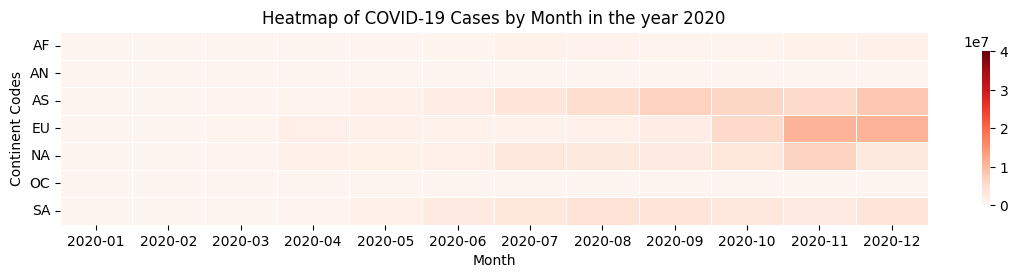

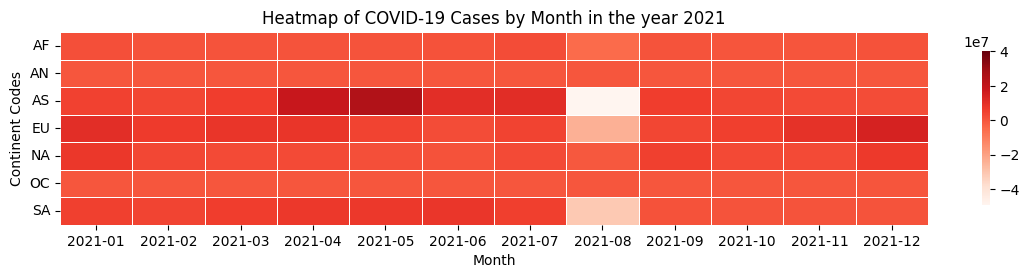

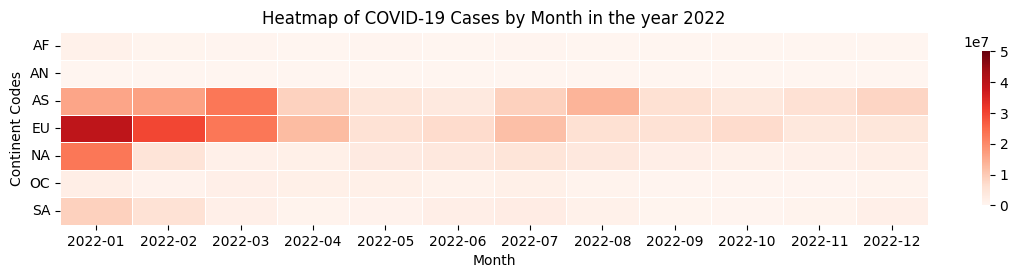

In [690]:
plt.figure(figsize=(14,2.5))
df_pivot = df_pivot0.transpose()
sns.heatmap(df_pivot, cmap='Reds', vmax= 4*10**7,linewidths=.5, cbar_kws={'shrink': .8})
plt.title('Heatmap of COVID-19 Cases by Month in the year 2020')
plt.ylabel('Continent Codes')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

plt.figure(figsize=(14,2.5))
df_pivot1 = df_pivot1.transpose()
sns.heatmap(df_pivot1, cmap='Reds',vmax= 4*10**7, linewidths=.5, cbar_kws={'shrink': .8})
plt.title('Heatmap of COVID-19 Cases by Month in the year 2021')
plt.ylabel('Continent Codes')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

plt.figure(figsize=(14,2.5))
df_pivot2 = df_pivot2.transpose()
sns.heatmap(df_pivot2, cmap='Reds',vmax= 5*10**7, linewidths=.5, cbar_kws={'shrink': .8})
plt.title('Heatmap of COVID-19 Cases by Month in the year 2022')
plt.ylabel('Continent Codes')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()



Key Question:

2. Do the waves/peaks have any periodicity to them?

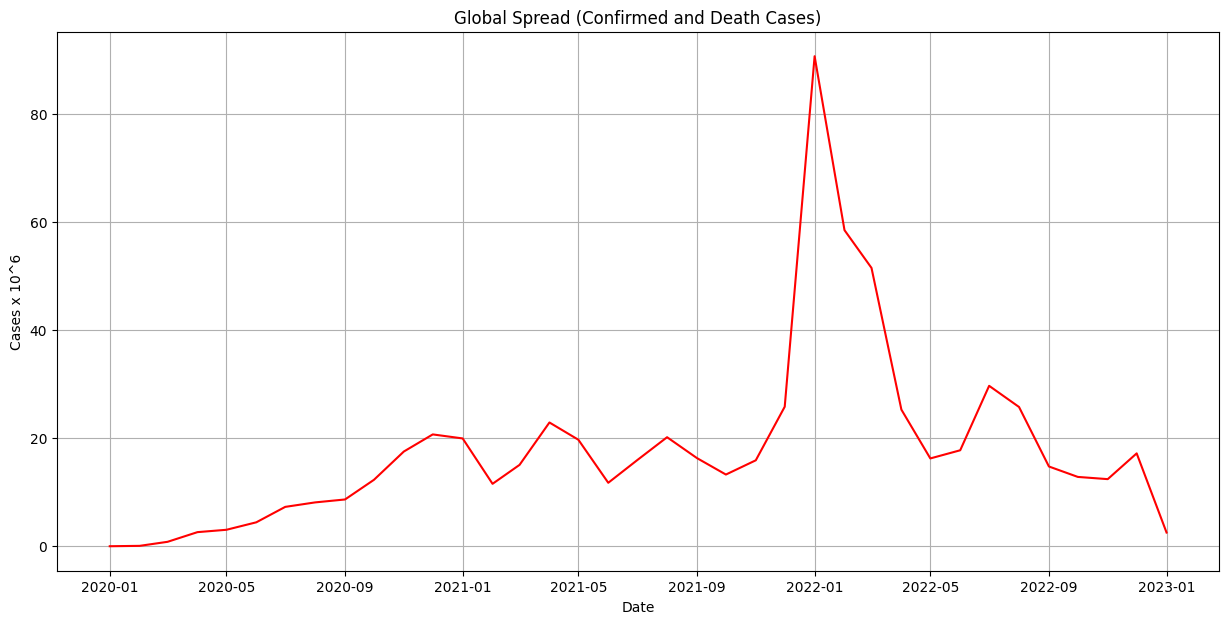

In [691]:

cases['month'] = cases['date'].dt.to_period('M')
df_case = cases.groupby(['month','type'])['cases'].sum().reset_index()
df_case['month'] = df_case['month'].dt.to_timestamp()
df_case = df_case[df_case['type'] != 'recovery']
df_case = df_case.groupby(['month'])['cases'].sum().reset_index()

df_case['cases'] = df_case['cases']/1000000 #per 1 million persons
plt.figure(figsize=(15, 7))

plt.plot(df_case['month'], df_case['cases'], color = 'red')
plt.xlabel('Date')
plt.ylabel('Cases x 10^6')
plt.title('Global Spread (Confirmed and Death Cases)')
plt.grid(True)
plt.show() 



As we can see from the above line plot: 
* In the period 2020 - 2022, we see the peaks appear approximately every 4 months. 
* In the period 2022-01 to 2022-05, we see the highest wave of the virus.
* After this we see the waves following the similar pattern of recurring peaks every 4-5 months.

Key Question:

3. Does geography have any affect on mortality/recovery?

In [692]:
display(cases[cases['iso2'].isna()])

,date,province,country,lat,long,type,cases,iso2,iso3,population,continent_name,continent_code,year,month


In [693]:
# Setting the path to the shapefile
SHAPEFILE = 'shapefiles/ne_10m_admin_0_countries.shp'
# Read shapefile using Geopandas
geo_df = gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]
# Rename columns.
geo_df.columns = ['country', 'country_code', 'geometry']
geo_df.head(3)

,country,country_code,geometry
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."


<Axes: >

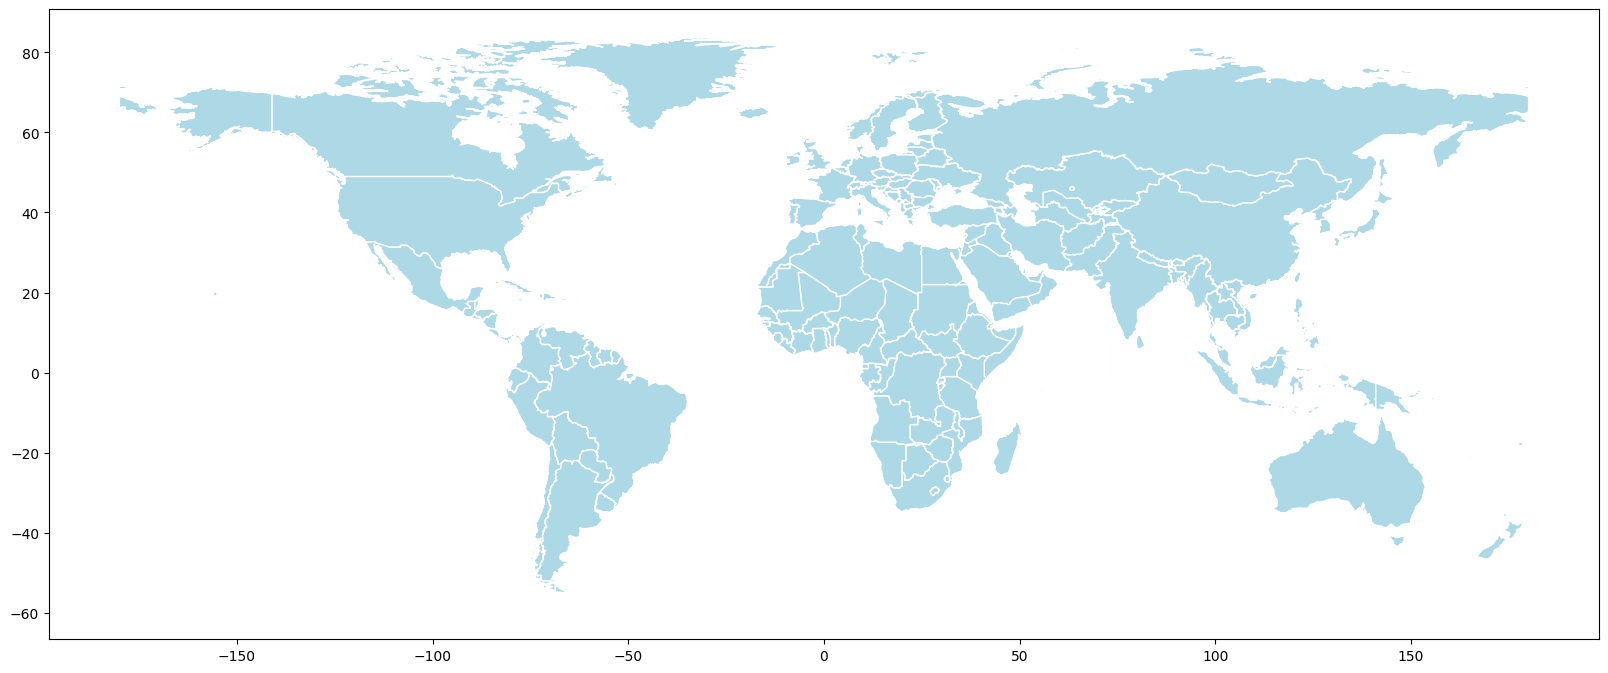

In [694]:
# Drop row for 'Antarctica'. It takes a lot of space in the map and is not of much use
geo_df = geo_df.drop(geo_df.loc[geo_df['country'] == 'Antarctica'].index)
# Print the map
geo_df.plot(figsize=(20, 20), edgecolor='white', linewidth=1, color='lightblue')

In [695]:
# Next, we need to ensure that our data matches with the country codes. 
iso3_codes = geo_df['country'].to_list()
# Convert to iso3_codes
iso2_codes_list = coco.convert(names=iso3_codes, to='ISO2', not_found='NULL')
# Add the list with iso2 codes to the dataframe
geo_df['iso2_code'] = iso2_codes_list
# There are some countries for which the converter could not find a country code. 
# We will drop these countries.
geo_df = geo_df.drop(geo_df.loc[geo_df['iso2_code'] == 'NULL'].index)

Dhekelia Sovereign Base Area not found in regex
US Naval Base Guantanamo Bay not found in regex
Siachen Glacier not found in regex
Baykonur Cosmodrome not found in regex
Akrotiri Sovereign Base Area not found in regex
Southern Patagonian Ice Field not found in regex
Bir Tawil not found in regex
Indian Ocean Territories not found in regex
Coral Sea Islands not found in regex
Spratly Islands not found in regex
Clipperton Island not found in regex
Ashmore and Cartier Islands not found in regex
Bajo Nuevo Bank (Petrel Is.) not found in regex
Serranilla Bank not found in regex
Scarborough Reef not found in regex


In [696]:
covid_df = cases.groupby(['iso2','type'])['cases'].sum().reset_index()
covid_recovery_df = covid_df[covid_df['type'] == 'recovered']
covid_death_df = covid_df[covid_df['type'] == 'death']
covid_death_df = cases.groupby(['iso2'])['cases'].sum().reset_index()
covid_recovery_df = cases.groupby(['iso2'])['cases'].sum().reset_index()

# display(covid_recovery_df)

merged_df = pd.merge(left=geo_df, right=covid_recovery_df, how='left', left_on='iso2_code', right_on='iso2')

df = merged_df.drop(['iso2'], axis=1)

df['cases'].fillna(0, inplace=True) 
df.head(3)

C:\Users\admin\AppData\Local\Temp\ipykernel_11716\3891053827.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cases'].fillna(0, inplace=True)


,country,country_code,geometry,iso2_code,cases
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",ID,6882349.0
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",MY,5065082.0
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",CL,5111328.0


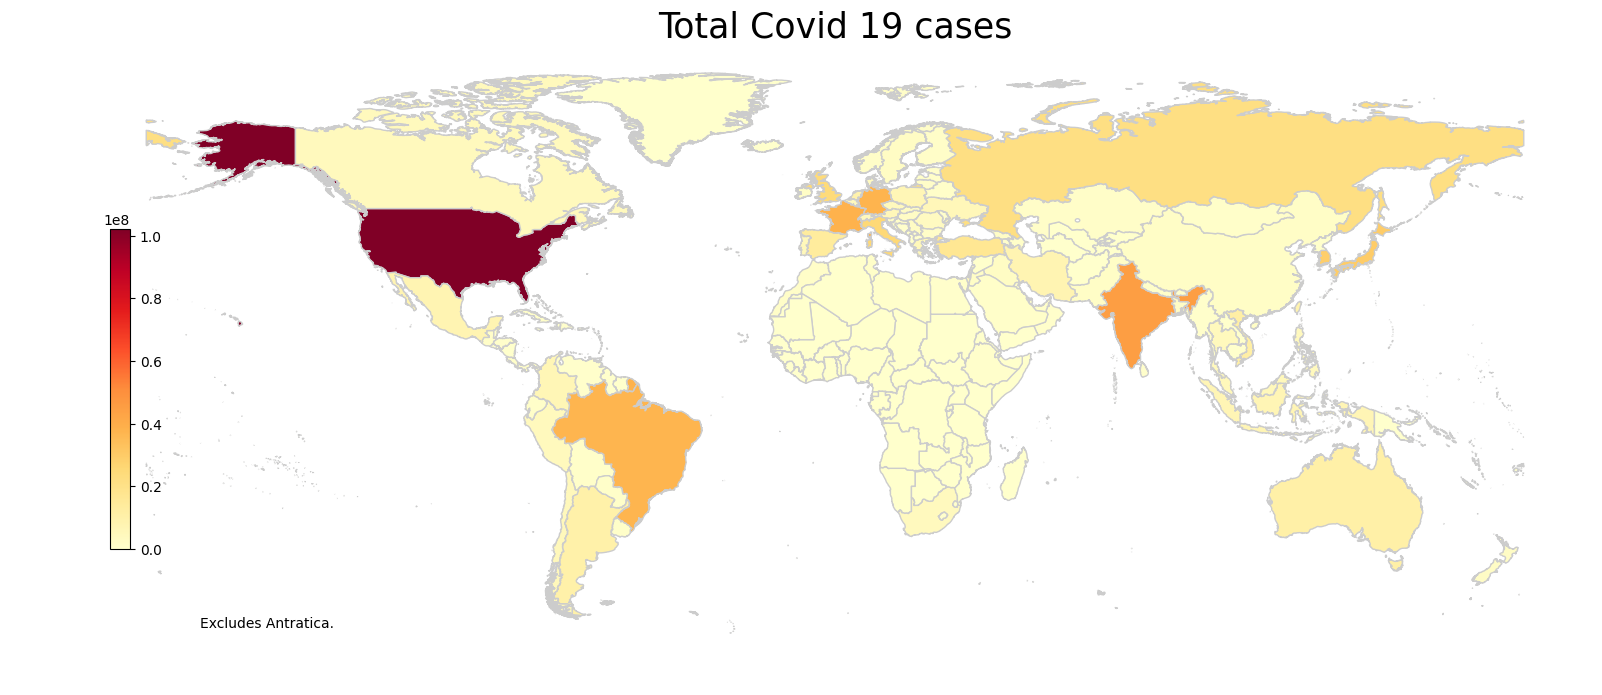

In [697]:
# Print the map
# Set the range for the choropleth
title = 'Total Covid 19 cases'
col = 'Total cases in each country (2020 - 2023)'
source = 'Excludes Antratica.'
vmin = df['cases'].min()
vmax = df['cases'].max()
cmap = 'YlOrRd'
# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 8))
# Remove the axis
ax.axis('off')
df.plot(column='cases', ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)
# Add a title
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})
# Create an annotation for the data source
ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='bottom', fontsize=10)
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
# Empty array for the data range
sm._A = []
# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

We can see no obvious relation between the geographical location and the total covid-19 cases of each country.